In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split

In [3]:
train_data= pd.read_csv("C:\\Users\\HP\\Desktop\\data.csv")

In [4]:
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 'diff_sym_hos'
]
x=train_data[feature_cols]
y=train_data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

Results before tuning the parameters

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(x_test)
# comparing actual response values (y_test) with predicted response values (y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       116
           1       0.20      0.21      0.21        14

    accuracy                           0.82       130
   macro avg       0.55      0.56      0.55       130
weighted avg       0.83      0.82      0.83       130



In [6]:
from sklearn import metrics
print("Bayes classifier model accuracy(in %):", metrics.accuracy_score(y_test,y_pred)*100)

Bayes classifier model accuracy(in %): 82.3076923076923


Start tuning the hyperparameters using bayesSearch algorithm
Note that the two hyperparameters are 
1. var smoothing which detects the variation in smoothing gaussian distribution
2. Priors 

Tuning the var smoothing hyperparameter

In [7]:
# define the bayes search algorithm
from skopt import BayesSearchCV
params = {'var_smoothing': np.logspace(0,-9, num=100)}

search = BayesSearchCV(
    estimator=gnb,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)
search.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END var_smoothing=5.336699231206313e-06;, score=0.884 total time=   0.0s
[CV 2/5] END var_smoothing=5.336699231206313e-06;, score=0.868 total time=   0.0s
[CV 3/5] END var_smoothing=5.336699231206313e-06;, score=0.868 total time=   0.0s
[CV 4/5] END var_smoothing=5.336699231206313e-06;, score=0.876 total time=   0.0s
[CV 5/5] END var_smoothing=5.336699231206313e-06;, score=0.875 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 2/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 3/5] END .var_smoothing=0.03511191734215131;, score=0.942 total time=   0.0s
[CV 4/5] END .var_smoothing=0.03511191734215131;, score=0.893 total time=   0.0s
[CV 5/5] END .var_smoothing=0.03511191734215131;, score=0.950 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5]

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 2/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 3/5] END .var_smoothing=0.03511191734215131;, score=0.942 total time=   0.0s
[CV 4/5] END .var_smoothing=0.03511191734215131;, score=0.893 total time=   0.0s
[CV 5/5] END .var_smoothing=0.03511191734215131;, score=0.950 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.884 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.868 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.868 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.860 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.875 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 2/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 3/5] END .var_smoothing=0.03511191734215131;, score=0.942 total time=   0.0s
[CV 4/5] END .var_smoothing=0.03511191734215131;, score=0.893 total time=   0.0s
[CV 5/5] END .var_smoothing=0.03511191734215131;, score=0.950 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..var_smoothing=0.0533669923120631;, score=0.909 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.0533669923120631;, score=0.901 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.0533669923120631;, score=0.934 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.0533669923120631;, score=0.901 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.0533669923120631;, score=0.950 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

BayesSearchCV(cv=5, estimator=GaussianNB(), n_iter=30, random_state=42,
              scoring='accuracy',
              search_spaces={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02,...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
              verbose=4)

In [8]:
# make prediction on the validation data
bayesSearch= search.predict(x_validate)
# print the best score by applying different variations in the smoothing hyperparameter
print(search.best_score_)

0.9238842975206613


In [9]:
# try figuring out the best value for var smoothing
print(search.best_params_)


OrderedDict([('var_smoothing', 0.03511191734215131)])


In [10]:
print(classification_report(y_validate, bayesSearch))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       108
           1       0.67      0.19      0.30        21

    accuracy                           0.85       129
   macro avg       0.76      0.59      0.61       129
weighted avg       0.83      0.85      0.82       129



Apply the same steps on the testing data

In [11]:
# make prediction on the testing data
bayesSearch= search.predict(x_test)
print(classification_report(y_test, bayesSearch))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.50      0.14      0.22        14

    accuracy                           0.89       130
   macro avg       0.70      0.56      0.58       130
weighted avg       0.86      0.89      0.86       130



In [12]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, bayesSearch)*100)

Gaussian Naive Bayes model accuracy(in %): 89.23076923076924


Another technique to tune the var smoothing parameter , we will seperating the data into folds.

RepeatedStratifiedKFold allows improving the estimated performance of a machine learning model, by simply repeating the cross-validation procedure multiple times (according to the n_repeats value), and reporting the mean result across all folds from all runs.

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gaussian_grid = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gaussian_grid.fit(x_train, y_train)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [14]:
folds_grid =gaussian_grid.predict(x_test)
print(classification_report(y_test, folds_grid))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.50      0.14      0.22        14

    accuracy                           0.89       130
   macro avg       0.70      0.56      0.58       130
weighted avg       0.86      0.89      0.86       130



In [15]:
gaussian_grid.best_params_

{'var_smoothing': 0.03511191734215131}

In [16]:
gaussian_grid.best_score_

0.9277180899908172

In [17]:
results = pd.DataFrame(gaussian_grid.cv_results_['params'])
results['test_score'] = gaussian_grid.cv_results_['mean_test_score']

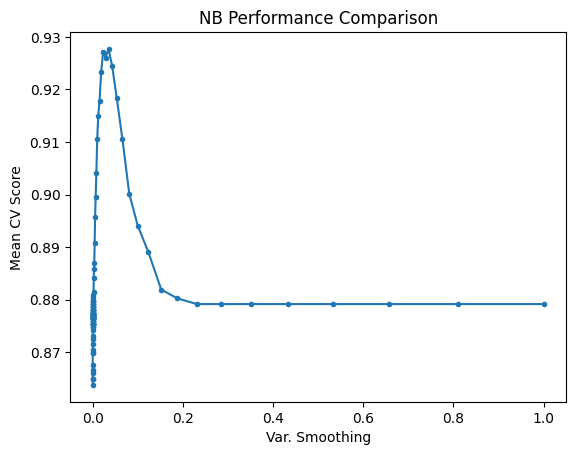

In [18]:
plt.plot(results['var_smoothing'], results['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

Try to change repeat paramter  & random_state

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv_method2 = RepeatedStratifiedKFold(n_splits=2, 
                                    n_repeats=7, 
                                    random_state=900)

params_NB2 = {'var_smoothing': np.logspace(0,-9, num=100)}

gaussian_grid3 = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB2, 
                     cv=cv_method2,
                     verbose=1, 
                     scoring='accuracy')

gaussian_grid3.fit(x_train, y_train)
folds_grid3 =gaussian_grid3.predict(x_test)
print(classification_report(y_test, folds_grid3))

Fitting 14 folds for each of 100 candidates, totalling 1400 fits
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       116
           1       0.40      0.14      0.21        14

    accuracy                           0.88       130
   macro avg       0.65      0.56      0.57       130
weighted avg       0.85      0.88      0.86       130



In [20]:
gaussian_grid3.best_params_
#result changes bec of decreasing number of fols and random state 

{'var_smoothing': 0.02848035868435802}

In [21]:
gaussian_grid3.best_score_
#result changes bec of decreasing number of fols and random state 


0.9236045411542102

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


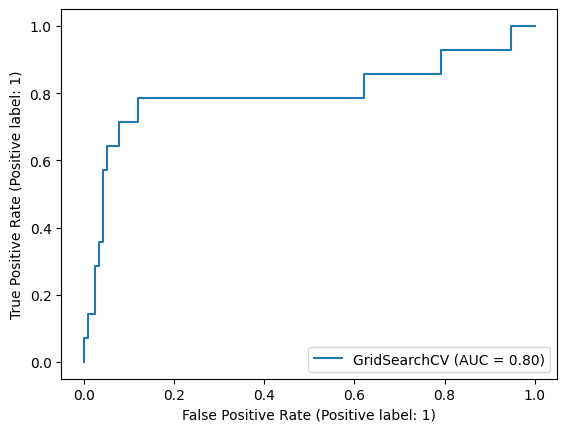

In [22]:
from sklearn import metrics
metrics.plot_roc_curve(gaussian_grid3,x_test,y_test)

Try to change the folds parameters

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv_method3 = RepeatedStratifiedKFold(n_splits=6, 
                                    n_repeats=3, 
                                    random_state=900)

params_NB3 = {'var_smoothing': np.logspace(0,-9, num=100)}

gaussian_grid4 = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB3, 
                     cv=cv_method3,
                     verbose=1, 
                     scoring='accuracy')

gaussian_grid4.fit(x_train, y_train)
folds_grid4 =gaussian_grid4.predict(x_test)
print(classification_report(y_test, folds_grid4))


Fitting 18 folds for each of 100 candidates, totalling 1800 fits
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       116
           1       0.40      0.14      0.21        14

    accuracy                           0.88       130
   macro avg       0.65      0.56      0.57       130
weighted avg       0.85      0.88      0.86       130



In [24]:
gaussian_grid4.best_params_

{'var_smoothing': 0.02848035868435802}

In [25]:
gaussian_grid4.best_score_

0.9271562156215621

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


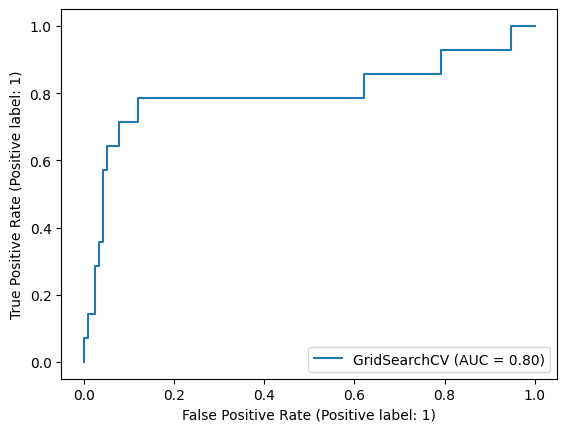

In [26]:
from sklearn import metrics
metrics.plot_roc_curve(gaussian_grid4,x_test,y_test)

Trying to tune the second hyperparameter which is the priors

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.class_prior_ = [0.1,0.5, 0.7,0.9,0.8,1] #make the algorithm start fitting these prior values and test on validation data
gnb1.fit(x_train, y_train)
yPredicted1 = gnb1.predict(x_validate)
print(classification_report(y_validate, yPredicted1))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       108
           1       0.50      0.52      0.51        21

    accuracy                           0.84       129
   macro avg       0.70      0.71      0.71       129
weighted avg       0.84      0.84      0.84       129



In [28]:
#test on testing data
yPredicted2 = gnb1.predict(x_test)
print(classification_report(y_test, yPredicted2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       116
           1       0.20      0.21      0.21        14

    accuracy                           0.82       130
   macro avg       0.55      0.56      0.55       130
weighted avg       0.83      0.82      0.83       130



In [29]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, yPredicted2)*100)

Gaussian Naive Bayes model accuracy(in %): 82.3076923076923


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.class_prior_ = [0.2,0.3, 0.5,0.9,1] #make the algorithm start fitting these prior values and test on validation data
gnb2.fit(x_train, y_train)
yPredicted2 = gnb2.predict(x_validate)
print(classification_report(y_validate, yPredicted2))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       108
           1       0.50      0.52      0.51        21

    accuracy                           0.84       129
   macro avg       0.70      0.71      0.71       129
weighted avg       0.84      0.84      0.84       129



In [31]:
#test on testing data
yPredicted3 = gnb2.predict(x_test)
print(classification_report(y_test, yPredicted3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       116
           1       0.20      0.21      0.21        14

    accuracy                           0.82       130
   macro avg       0.55      0.56      0.55       130
weighted avg       0.83      0.82      0.83       130



In [32]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, yPredicted3)*100)

Gaussian Naive Bayes model accuracy(in %): 82.3076923076923


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


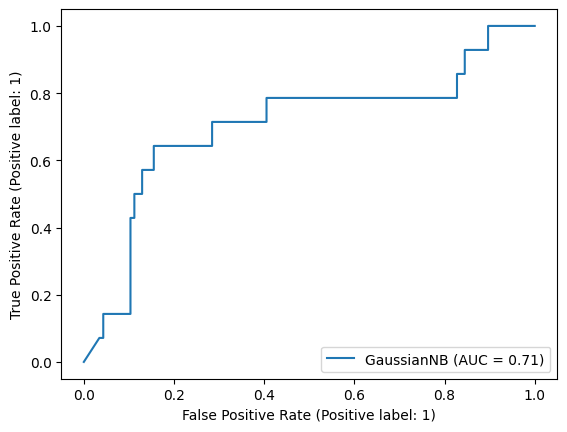

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(gnb2,x_test,y_test)

Another techniques for naive bayes

In [34]:
from sklearn.naive_bayes import BernoulliNB
bernouli=BernoulliNB(alpha=1)
bernouli.fit(x_train,y_train)
yPredicted3 = bernouli.predict(x_test)
print(classification_report(y_test, yPredicted3))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       116
           1       0.00      0.00      0.00        14

    accuracy                           0.88       130
   macro avg       0.45      0.50      0.47       130
weighted avg       0.80      0.88      0.84       130



In [35]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,yPredicted3))
print("roc score",metrics.roc_auc_score(y_test,yPredicted3))#row curve is the best method

Accuracy  0.8846153846153846
roc score 0.4956896551724138


In [37]:
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB
multi=MultinomialNB()
multi.fit(x_train,y_train)
yPredicted4 = multi.predict(x_test)
print(classification_report(y_test, yPredicted4))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       116
           1       0.00      0.00      0.00        14

    accuracy                           0.89       130
   macro avg       0.45      0.50      0.47       130
weighted avg       0.80      0.89      0.84       130



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [39]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,yPredicted4))
print("roc score",metrics.roc_auc_score(y_test,yPredicted4))#row curve is the best method

Accuracy  0.8923076923076924
roc score 0.5
